In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DEEP LEARNING
## Artificial Neural Network

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/phytoplankton.csv')

In [ ]:
df.head()

,Phytoplankton Monitoring Programme results,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Sample number,Production area,Bed ID,Local authority,Grid reference\n\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessot...,Prorocentrum cordatum \ncells L-1\n(Venerupin),NaN,NaN
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,04/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,04/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,05/01/2021,ND,ND,ND,400,ND,ND,ND,NaN,NaN
4,4/21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,05/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN


In [ ]:
df.shape

(882, 16)

## Data Cleaning

In [ ]:
new_header = df.iloc[0] #grab the first row for the header 
df = df[1:] #take the data less the header row 
df.columns = new_header #set the header row as the df header 
df = df[:828] 

In [ ]:
df.isnull().sum()

0
Sample number                                             0
Production area                                           1
Bed ID                                                    1
Local authority                                           0
Grid reference\n\nNote 1                                  1
Sampling point                                            0
Date sample collected                                     0
Alexandrium spp. \ncells L-1\n(PSP)                       0
Dinophysiaceae \ncells L-1\n(DSP)                         1
Prorocentrum lima \ncells L-1\n(DSP)                      1
Pseudo-nitzschia spp. \ncells L-1\n(ASP)                  1
Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)          1
Protoceratium reticulatum \ncells L-1\n(Yessotoxin)       0
Prorocentrum cordatum \ncells L-1\n(Venerupin)            0
NaN                                                     828
NaN                                                     828
dtype: int64

In [ ]:
def clean_data(df):
    df["Alexandrium spp. \ncells L-1\n(PSP)"] = df["Alexandrium spp. \ncells L-1\n(PSP)"].replace("ND", 0) 
    df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].replace("ND", 0) 
    df["Dinophysiaceae \ncells L-1\n(DSP)"] = df["Dinophysiaceae \ncells L-1\n(DSP)"].replace("ND", 0) 
    df["Prorocentrum lima \ncells L-1\n(DSP)"] = df["Prorocentrum lima \ncells L-1\n(DSP)"].replace("ND", 0)   

    df["Alexandrium spp. \ncells L-1\n(PSP)"] = pd.to_numeric(df["Alexandrium spp. \ncells L-1\n(PSP)"], errors='coerce') 
    df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = pd.to_numeric(df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "], errors='coerce')      
    df["Dinophysiaceae \ncells L-1\n(DSP)"] = pd.to_numeric(df["Dinophysiaceae \ncells L-1\n(DSP)"], errors='coerce')      
    df["Prorocentrum lima \ncells L-1\n(DSP)"] = pd.to_numeric(df["Prorocentrum lima \ncells L-1\n(DSP)"], errors='coerce')  
  
    df["Alexandrium spp. \ncells L-1\n(PSP)"] = df["Alexandrium spp. \ncells L-1\n(PSP)"].fillna(-1) 
    df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].fillna(-1) 
    df["Dinophysiaceae \ncells L-1\n(DSP)"] = df["Dinophysiaceae \ncells L-1\n(DSP)"].fillna(-1) 
    df["Prorocentrum lima \ncells L-1\n(DSP)"] = df["Prorocentrum lima \ncells L-1\n(DSP)"].fillna(-1)

In [ ]:
clean_data(df)
df.head()

,Sample number,Production area,Bed ID,Local authority,Grid reference\n\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessotoxin),Prorocentrum cordatum \ncells L-1\n(Venerupin),NaN,NaN
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,04/01/2021,0.0,0.0,0.0,0.0,ND,ND,ND,NaN,NaN
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,04/01/2021,0.0,0.0,0.0,0.0,ND,ND,ND,NaN,NaN
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,05/01/2021,0.0,0.0,0.0,400.0,ND,ND,ND,NaN,NaN
4,4/21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,05/01/2021,0.0,0.0,0.0,0.0,ND,ND,ND,NaN,NaN
5,5/21,Blackwater,B14AD,Maldon DC,TM04060768,St Peters Flats,06/01/2021,0.0,0.0,0.0,0.0,ND,ND,ND,NaN,NaN


## Data Labelling

In [ ]:
thresholds = {"Alexandrium spp. \ncells L-1\n(PSP)" : 40, "Dinophysiaceae \ncells L-1\n(DSP)" : 100, "Prorocentrum lima \ncells L-1\n(DSP)" : 100, "Pseudo-nitzschia spp. \ncells L-1\n(ASP) " : 150000} 

In [ ]:
def check_thresholds(df): 
    t = [] 
    for i,j in enumerate(df["Sample number"]): 

        alexandrium = df.iloc[i]["Alexandrium spp. \ncells L-1\n(PSP)"]    
        pseudo_nitzschia = df.iloc[i]["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] 
        dinophysiaceae = df.iloc[i]["Dinophysiaceae \ncells L-1\n(DSP)"] 
        prorocentrum = df.iloc[i]["Prorocentrum lima \ncells L-1\n(DSP)"] 

        threshold_reached = 0 
        if pseudo_nitzschia >= thresholds["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]: 
            threshold_reached = 1 
        elif dinophysiaceae >= thresholds["Dinophysiaceae \ncells L-1\n(DSP)"]: 
            threshold_reached = 1 
        elif prorocentrum >= thresholds["Prorocentrum lima \ncells L-1\n(DSP)"]: 
            threshold_reached = 1                
        elif alexandrium >= thresholds["Alexandrium spp. \ncells L-1\n(PSP)"]: 
            threshold_reached = 1                
       
        t.append(threshold_reached) 
     
    return t 

In [ ]:
thresholds_reached = check_thresholds(df) 
df['thresholds_reached'] = thresholds_reached 
#pd.DataFrame.to_csv(df, '/Users/wuraolaifeoluwa/Documents/Rasheed data doc/datasets/thresholds_cleaned.csv', sep=',', index=False) 

In [ ]:
x = pd.read_csv('/content/drive/MyDrive/thresholds_cleaned.csv', usecols=["Pseudo-nitzschia spp. \ncells L-1\n(ASP) ", "Dinophysiaceae \ncells L-1\n(DSP)", "Prorocentrum lima \ncells L-1\n(DSP)", "Alexandrium spp. \ncells L-1\n(PSP)"], na_values = ['no info', '.']) 
y = pd.read_csv('/content/drive/MyDrive/thresholds_cleaned.csv', usecols=["thresholds_reached"]) 

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from keras.optimizers import * 
from keras.utils import np_utils 

In [ ]:
model = Sequential() 
model.add(Dense(units=1000, activation='relu', input_shape=(4,))) 
model.add(Dropout(0.9)) 
model.add(Dense(units=5, activation='relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(1, activation='relu'))

model.summary() 
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              5000      
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 5005      
                                                                 
 dropout_1 (Dropout)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 10,011
Trainable params: 10,011
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
history = model.fit(x_train, y_train, 
                    batch_size=16, 
                    epochs=10, 
                    verbose=1, 
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Epoch 1/10
42/42 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.8837 - val_loss: nan - val_accuracy: 0.8916
Epoch 2/10
42/42 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.8837 - val_loss: nan - val_accuracy: 0.8916
Epoch 3/10
42/42 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.8837 - val_loss: nan - val_accuracy: 0.8916
Epoch 4/10
42/42 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.8837 - val_loss: nan - val_accuracy: 0.8916
Epoch 5/10
42/42 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.8837 - val_loss: nan - val_accuracy: 0.8916
Epoch 6/10
42/42 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.8837 - val_loss: nan - val_accuracy: 0.8916
Epoch 7/10
42/42 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.8837 - val_loss: nan - val_accuracy: 0.8916
Epoch 8/10
42/42 [==============================] - 0s 3ms/ste

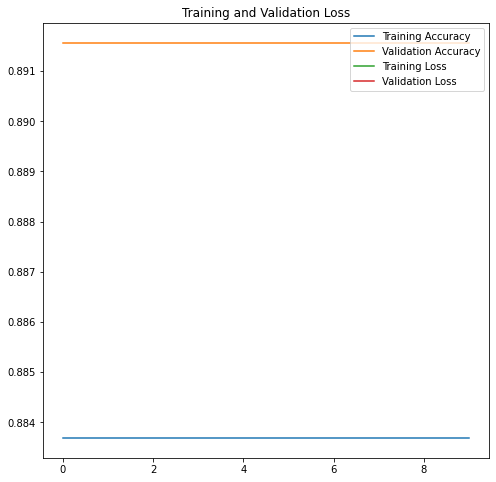

In [ ]:
epochs=10
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(epochs) 

plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 

plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 

plt.title('Training and Validation Loss') 
plt.savefig("water_quality_nn.pdf", dpi=100) 
plt.show()

## 4. Data augmentation 

In [ ]:
predictions = np.zeros(len(x_test))

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y["thresholds_reached"] == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y["thresholds_reached"] == 0)))

Before OverSampling, counts of label '1': 95
Before OverSampling, counts of label '0': 733 



In [ ]:
!pip install imbalanced-learn 

In [ ]:
from collections import Counter 
from sklearn.svm import LinearSVC 
from imblearn.pipeline import make_pipeline 
from imblearn.base import BaseSampler 
from imblearn.over_sampling import (SMOTE, RandomOverSampler) 
#!pip install imbalanced-learn 
import imblearn 
from imblearn.over_sampling import SMOTE 

In [ ]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(x, y["thresholds_reached"].ravel()) 

In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of train_X: (1466, 4)
After OverSampling, the shape of train_y: (1466,) 

After OverSampling, counts of label '1': 733
After OverSampling, counts of label '0': 733


0                                          Alexandrium spp. \ncells L-1\n(PSP)  ...  thresholds_reached
0                                                                               ...                    
Alexandrium spp. \ncells L-1\n(PSP)                                   1.000000  ...            0.455902
Dinophysiaceae \ncells L-1\n(DSP)                                     0.055174  ...            0.461656
Prorocentrum lima \ncells L-1\n(DSP)                                 -0.008287  ...            0.140486
Pseudo-nitzschia spp. \ncells L-1\n(ASP)                              0.019008  ...            0.258077
NaN                                                                        NaN  ...                 NaN
NaN                                                                        NaN  ...                 NaN
thresholds_reached                                                    0.455902  ...            1.000000

[7 rows x 7 columns]


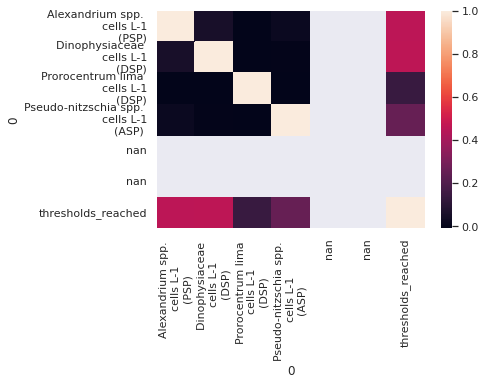

In [ ]:
import numpy as np; np.random.seed(0) 
import seaborn as sns; sns.set_theme() 
corrMatrix = df.corr() 

print (corrMatrix) 
ax = sns.heatmap(corrMatrix)

# Building another neural network
## Neural Network 1

In [ ]:
model_1 = Sequential() 
model_1.add(Dense(units=1000, activation='sigmoid', input_shape=(4,))) 
model_1.add(Dropout(0.5)) 
model_1.add(Dense(units=5, activation='sigmoid')) 
model_1.add(Dropout(0.2)) 
model_1.add(Dense(1, activation='sigmoid'))

model_1.summary() 
model_1.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1000)              5000      
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_4 (Dense)             (None, 5)                 5005      
                                                                 
 dropout_3 (Dropout)         (None, 5)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 10,011
Trainable params: 10,011
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
history = model_1.fit(x_train, y_train, 
                    batch_size=16, 
                    epochs=10, 
                    verbose=1, 
                    validation_data=(x_test, y_test))

score = model_1.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Epoch 1/10
42/42 [==============================] - 1s 6ms/step - loss: 0.4182 - accuracy: 0.8776 - val_loss: 0.3647 - val_accuracy: 0.8916
Epoch 2/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3982 - accuracy: 0.8837 - val_loss: 0.3470 - val_accuracy: 0.8916
Epoch 3/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3670 - accuracy: 0.8837 - val_loss: 0.3179 - val_accuracy: 0.8916
Epoch 4/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3390 - accuracy: 0.8837 - val_loss: 0.3085 - val_accuracy: 0.8916
Epoch 5/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3407 - accuracy: 0.8837 - val_loss: 0.2996 - val_accuracy: 0.8916
Epoch 6/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3230 - accuracy: 0.8867 - val_loss: 0.2794 - val_accuracy: 0.8916
Epoch 7/10
42/42 [==============================] - 0s 3ms/step - loss: 0.2935 - accuracy: 0.9154 - val_loss: 0.2567 - val_accuracy: 0.9578
Epoch 8/10
42/42 [==

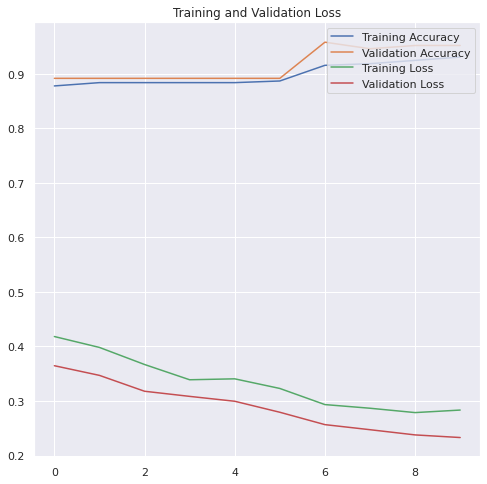

In [ ]:
epochs=10
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(epochs) 

plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 

plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy for Neural Network 1') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 

plt.title('Training and Validation Loss') 
plt.savefig("water_quality_nn.pdf", dpi=100) 
plt.show()

## Neural Network 2

In [ ]:
model = Sequential() 
model.add(Dense(units=1000, activation='tanh', input_shape=(4,))) 
model.add(Dropout(0.5)) 
model.add(Dense(units=20, activation='tanh')) 
model.add(Dropout(0.2)) 
model.add(Dense(units=5, activation='tanh')) 
model.add(Dropout(0.2))
model.add(Dense(1, activation='tanh'))

model.summary() 
model.compile(loss='binary_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1000)              5000      
                                                                 
 dropout_4 (Dropout)         (None, 1000)              0         
                                                                 
 dense_7 (Dense)             (None, 20)                20020     
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_8 (Dense)             (None, 5)                 105       
                                                                 
 dropout_6 (Dropout)         (None, 5)                 0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
history = model.fit(x_train, y_train, 
                    batch_size=16, 
                    epochs=10, 
                    verbose=1, 
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Epoch 1/10
42/42 [==============================] - 1s 7ms/step - loss: 1.4909 - accuracy: 0.8550 - val_loss: 1.4280 - val_accuracy: 0.8916
Epoch 2/10
42/42 [==============================] - 0s 3ms/step - loss: 1.2327 - accuracy: 0.8822 - val_loss: 0.8884 - val_accuracy: 0.8976
Epoch 3/10
42/42 [==============================] - 0s 3ms/step - loss: 1.1980 - accuracy: 0.7553 - val_loss: 0.8095 - val_accuracy: 0.9217
Epoch 4/10
42/42 [==============================] - 0s 3ms/step - loss: 0.8995 - accuracy: 0.8565 - val_loss: 0.8813 - val_accuracy: 0.9217
Epoch 5/10
42/42 [==============================] - 0s 3ms/step - loss: 1.0170 - accuracy: 0.7523 - val_loss: 0.4462 - val_accuracy: 0.5120
Epoch 6/10
42/42 [==============================] - 0s 3ms/step - loss: 0.8257 - accuracy: 0.7885 - val_loss: 0.2145 - val_accuracy: 0.9217
Epoch 7/10
42/42 [==============================] - 0s 3ms/step - loss: 0.8625 - accuracy: 0.8051 - val_loss: 0.8792 - val_accuracy: 0.9277
Epoch 8/10
42/42 [==

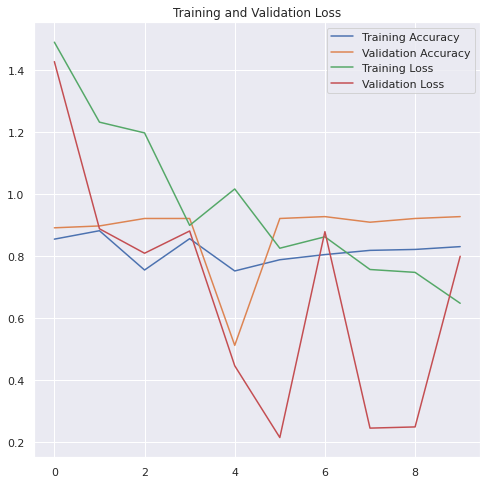

In [ ]:
epochs=10
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(epochs) 

plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 

plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy for Neural Network 2') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 

plt.title('Training and Validation Loss') 
plt.savefig("water_quality_nn.pdf", dpi=100) 
plt.show()

# Neural net 2B
Considering activation on test loss and accuracy

In [ ]:
model = Sequential() 
model.add(Dense(units=1000, activation='tanh', input_shape=(4,))) 
model.add(Dropout(0.5)) 
model.add(Dense(units=20, activation='tanh')) 
model.add(Dropout(0.2)) 
model.add(Dense(units=5, activation='tanh')) 
model.add(Dropout(0.2))
model.add(Dense(1, activation='tanh'))

model.summary() 
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1000)              5000      
                                                                 
 dropout_7 (Dropout)         (None, 1000)              0         
                                                                 
 dense_11 (Dense)            (None, 20)                20020     
                                                                 
 dropout_8 (Dropout)         (None, 20)                0         
                                                                 
 dense_12 (Dense)            (None, 5)                 105       
                                                                 
 dropout_9 (Dropout)         (None, 5)                 0         
                                                                 
 dense_13 (Dense)            (None, 1)                

In [ ]:
history = model.fit(x_train, y_train, 
                    batch_size=16, 
                    epochs=10, 
                    verbose=1, 
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Epoch 1/10
42/42 [==============================] - 1s 7ms/step - loss: 1.4465 - accuracy: 0.8882 - val_loss: 1.4069 - val_accuracy: 0.9036
Epoch 2/10
42/42 [==============================] - 0s 3ms/step - loss: 1.2506 - accuracy: 0.9048 - val_loss: 0.8982 - val_accuracy: 0.9036
Epoch 3/10
42/42 [==============================] - 0s 3ms/step - loss: 0.8985 - accuracy: 0.9124 - val_loss: 0.7136 - val_accuracy: 0.9217
Epoch 4/10
42/42 [==============================] - 0s 3ms/step - loss: 0.8295 - accuracy: 0.9199 - val_loss: 0.6472 - val_accuracy: 0.9277
Epoch 5/10
42/42 [==============================] - 0s 3ms/step - loss: 0.8330 - accuracy: 0.9230 - val_loss: 0.6235 - val_accuracy: 0.9217
Epoch 6/10
42/42 [==============================] - 0s 3ms/step - loss: 0.7743 - accuracy: 0.9245 - val_loss: 0.6571 - val_accuracy: 0.9277
Epoch 7/10
42/42 [==============================] - 0s 3ms/step - loss: 0.7478 - accuracy: 0.9260 - val_loss: 0.6445 - val_accuracy: 0.9277
Epoch 8/10
42/42 [==

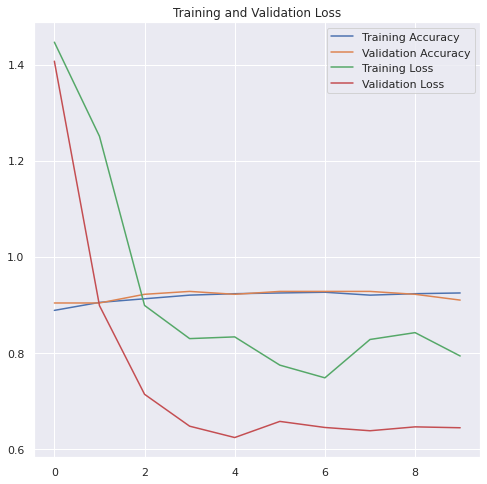

In [ ]:
epochs=10
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(epochs) 

plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 

plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy for Neural Net 2B') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 

plt.title('Training and Validation Loss') 
plt.savefig("water_quality_nn.pdf", dpi=100) 
plt.show()

## Neural network 3

In [ ]:
model = Sequential() 
model.add(Dense(units=600, activation='sigmoid', input_shape=(4,))) 
model.add(Dropout(0.6)) 
model.add(Dense(units=30, activation='sigmoid')) 
model.add(Dropout(0.2)) 
model.add(Dense(units=10, activation='sigmoid')) 
model.add(Dropout(0.3)) 
model.add(Dense(1, activation='sigmoid'))

model.summary() 
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 600)               3000      
                                                                 
 dropout_10 (Dropout)        (None, 600)               0         
                                                                 
 dense_15 (Dense)            (None, 30)                18030     
                                                                 
 dropout_11 (Dropout)        (None, 30)                0         
                                                                 
 dense_16 (Dense)            (None, 10)                310       
                                                                 
 dropout_12 (Dropout)        (None, 10)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                

In [ ]:
history = model.fit(x_train, y_train, 
                    batch_size=16, 
                    epochs=10, 
                    verbose=1, 
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Epoch 1/10
42/42 [==============================] - 1s 7ms/step - loss: 0.4597 - accuracy: 0.8399 - val_loss: 0.3649 - val_accuracy: 0.8916
Epoch 2/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3898 - accuracy: 0.8822 - val_loss: 0.3483 - val_accuracy: 0.8916
Epoch 3/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3817 - accuracy: 0.8837 - val_loss: 0.3345 - val_accuracy: 0.8916
Epoch 4/10
42/42 [==============================] - 0s 4ms/step - loss: 0.3860 - accuracy: 0.8837 - val_loss: 0.3141 - val_accuracy: 0.8916
Epoch 5/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3433 - accuracy: 0.8837 - val_loss: 0.2841 - val_accuracy: 0.8916
Epoch 6/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3066 - accuracy: 0.8882 - val_loss: 0.2520 - val_accuracy: 0.8916
Epoch 7/10
42/42 [==============================] - 0s 3ms/step - loss: 0.2839 - accuracy: 0.9079 - val_loss: 0.2328 - val_accuracy: 0.9518
Epoch 8/10
42/42 [==

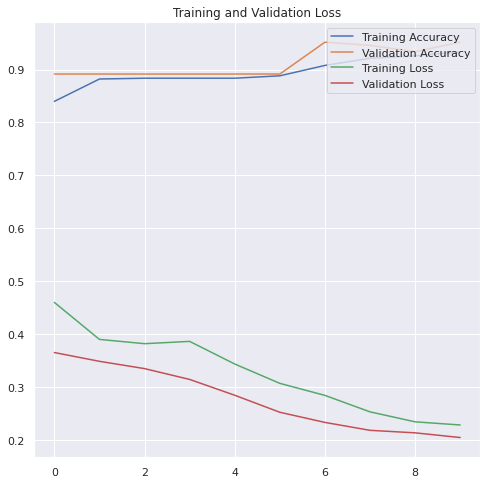

In [ ]:
epochs=10
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(epochs) 

plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 

plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy for Neural Network 3') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 

plt.title('Training and Validation Loss') 
plt.savefig("water_quality_nn.pdf", dpi=100) 
plt.show()


## more than 4 layers


In [ ]:
%%time
model = Sequential() 
model.add(Dense(units=1000, activation='tanh', input_shape=(4,))) 
model.add(Dropout(0.5)) 
model.add(Dense(units=600, activation='tanh')) 
model.add(Dropout(0.3)) 
model.add(Dense(units=300, activation='tanh')) 
model.add(Dropout(0.3)) 
model.add(Dense(units=100, activation='tanh')) 
model.add(Dropout(0.2)) 
model.add(Dense(units=50, activation='tanh')) 
model.add(Dropout(0.2)) 
model.add(Dense(units=30, activation='tanh')) 
model.add(Dropout(0.1)) 
model.add(Dense(1, activation='tanh'))

model.summary() 
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1000)              5000      
                                                                 
 dropout_13 (Dropout)        (None, 1000)              0         
                                                                 
 dense_19 (Dense)            (None, 600)               600600    
                                                                 
 dropout_14 (Dropout)        (None, 600)               0         
                                                                 
 dense_20 (Dense)            (None, 300)               180300    
                                                                 
 dropout_15 (Dropout)        (None, 300)               0         
                                                                 
 dense_21 (Dense)            (None, 100)              

In [ ]:
%%time
history = model.fit(x_train, y_train, 
                    batch_size=16, 
                    epochs=10, 
                    verbose=1, 
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Epoch 1/10
42/42 [==============================] - 1s 16ms/step - loss: 1.4918 - accuracy: 0.8973 - val_loss: 1.4100 - val_accuracy: 0.9036
Epoch 2/10
42/42 [==============================] - 1s 12ms/step - loss: 1.2153 - accuracy: 0.8474 - val_loss: 1.4090 - val_accuracy: 0.9036
Epoch 3/10
42/42 [==============================] - 0s 11ms/step - loss: 1.4387 - accuracy: 0.9003 - val_loss: 1.4034 - val_accuracy: 0.9036
Epoch 4/10
42/42 [==============================] - 0s 11ms/step - loss: 1.3874 - accuracy: 0.9063 - val_loss: 1.4060 - val_accuracy: 0.9036
Epoch 5/10
42/42 [==============================] - 1s 12ms/step - loss: 1.5153 - accuracy: 0.9018 - val_loss: 1.4868 - val_accuracy: 0.9036
Epoch 6/10
42/42 [==============================] - 0s 11ms/step - loss: 1.4705 - accuracy: 0.9033 - val_loss: 1.4024 - val_accuracy: 0.9036
Epoch 7/10
42/42 [==============================] - 0s 12ms/step - loss: 1.2912 - accuracy: 0.9048 - val_loss: 1.4085 - val_accuracy: 0.9036
Epoch 8/10
42

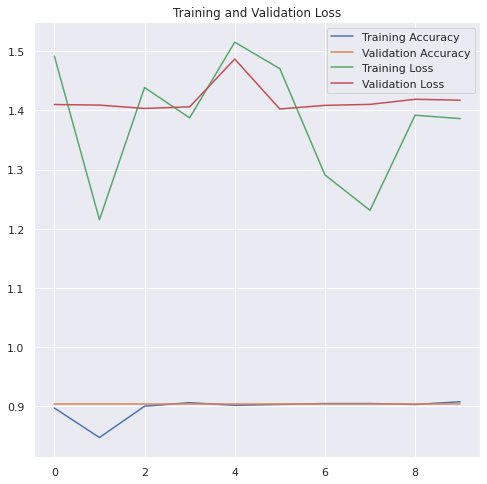

In [ ]:
epochs=10
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(epochs) 

plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 

plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 

plt.title('Training and Validation Loss') 
plt.savefig("water_quality_nn.pdf", dpi=100) 
plt.show()